1\. Find $w$ and $b$ for a neuron that predict groups with respect to the separation line $x_2=0$

In [1]:
# I guess that I'm not clearly anderstud problem

In [26]:
import csv
import numpy as np
import requests
import pandas as pd

def load_csv_dataset(file_name, dtype=float):
    #"""Downloads csv numeric dataset from repo to numpy array."""
    #base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    #web_data = requests.get(base_url + file_name)
    #assert web_data.status_code == 200
    
    with open(file_name, newline='') as csvfile:
        #reader = csv.reader(web_data.text.splitlines(), delimiter=',')
        reader = csv.reader(csvfile, delimiter=',')
        data = []
        for row in reader:
            try:
                # Try to parse as a row of floats
                float_row = [dtype(x) for x in row]
                data.append(float_row)
            except ValueError:
                # If parsing as floats failed - this is header
                print(row)

    return np.array(data)

In [28]:
data = load_csv_dataset('data/perceptron_data.csv')
print(data.shape)


['x1', 'x2']
(400, 2)


In [29]:
class Neuron:
    """
    Neuron with sigmoid activation and gradient with respect of MSE
    """
    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = b
    
    def __str__(self):
        """String reprsentation to print weights"""
        return f"w={self.w}, b={self.b}"
    
    def sigmoid(x):
        """Activation function used for training"""
        return 1.0 / (1.0 + np.exp(-x))
    
    def stepfunc(y):
        """Activation of the output layer for prediction mode"""
        return (y >= 0).astype(int)    

    def __call__(self, x, logits=False):
        """Feed-forward of inputs"""
        y0 = np.array(x) @ self.w + self.b
        if logits:
            return y0
        else:
            return Neuron.sigmoid(y0)
        
    def predict(self, x):
        """Do prediction"""
        y0 = self.__call__(x, logits=True)
        return Neuron.stepfunc(y0)
    
    def mae(self, x, y_true):
        """Mean absolute error, will be used as a metric reporting performance of the neuron"""
        y_pred = self.predict(x)
        return np.mean(np.abs((y_pred - y_true)))
    
    def grad(self, x, y_true):
        """Gradinet with respect to MSE loss function"""
        y0 = self.__call__(x, logits=True)
        sig_plus = Neuron.sigmoid(y0)
        sig_minus = Neuron.sigmoid(-y0)
        err = sig_plus - y_true
        tmp = err * sig_plus * sig_minus
        
        gr = []
        for xj in x.T:
            gr.append(2 * np.mean(tmp * xj))
        gr.append(2 * np.mean(tmp))
        
        return np.array(gr)

In [57]:
import numpy as np
rng = np.random.default_rng(seed=0)

# True class labels can be easily derived manually
y_true = [1 if x[1] < 0 else 0 for x in data]  

# The neuron with random initial values of parameters
nrn = Neuron(w = rng.uniform(size=(2,)), b = rng.uniform())
print(nrn)

w=[0.63696169 0.26978671], b=0.04097352393619469


In [58]:
epochs =  500
alpha = 1

train_curve = []
for epoch in range(epochs):
    grad = nrn.grad(data, y_true)
    nrn.w -= alpha * grad[:-1]
    nrn.b -= alpha * grad[-1]
    train_curve.append(nrn.mae(data, y_true))

train_curve[-10:]
print(nrn)

w=[ 0.61528743 -1.23720535], b=-0.2813370677433781


In [59]:
y_pred = nrn.predict(data)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [60]:
x_mesh = np.linspace(-1.7, 1.7, 100)  # x coordinates
y_mesh = np.linspace(3.3, 6.7, 100)    # y coordinates
X, Y = np.meshgrid(x_mesh, y_mesh)    # combine each one with each one
data_mesh = np.array([X.reshape(-1), Y.reshape(-1)]).T  # create a dataset that covers the whole plane
y_mesh = nrn.predict(data_mesh)

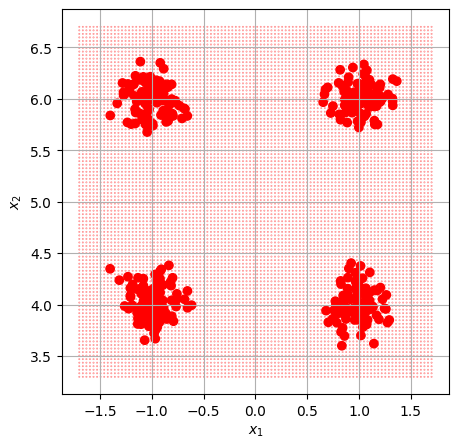

In [61]:
import matplotlib.pyplot as plt

colors = ['r', 'b']

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], color=[colors[y] for y in y_mesh], s=0.1, alpha=0.6)
ax.scatter(data[:, 0], data[:, 1], color=[colors[y] for y in y_pred])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.grid()

In [62]:
# but i guess that you mean x_1 = 0

w=[0.01652764 0.81327024], b=0.9127555772777217
w=[-3.89498724 -0.11519381], b=0.6100080818485425


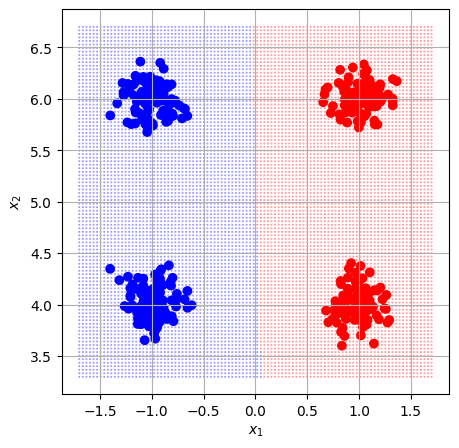

In [63]:
y_true = [1 if x[0] < 0 else 0 for x in data]  
nrn = Neuron(w = rng.uniform(size=(2,)), b = rng.uniform())
print(nrn)

epochs =  500
alpha = 1

train_curve = []
for epoch in range(epochs):
    grad = nrn.grad(data, y_true)
    nrn.w -= alpha * grad[:-1]
    nrn.b -= alpha * grad[-1]
    train_curve.append(nrn.mae(data, y_true))

train_curve[-10:]
print(nrn)

y_pred = nrn.predict(data)

x_mesh = np.linspace(-1.7, 1.7, 100)  # x coordinates
y_mesh = np.linspace(3.3, 6.7, 100)    # y coordinates
X, Y = np.meshgrid(x_mesh, y_mesh)    # combine each one with each one
data_mesh = np.array([X.reshape(-1), Y.reshape(-1)]).T  # create a dataset that covers the whole plane
y_mesh = nrn.predict(data_mesh)

colors = ['r', 'b']

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], color=[colors[y] for y in y_mesh], s=0.1, alpha=0.6)
ax.scatter(data[:, 0], data[:, 1], color=[colors[y] for y in y_pred])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.grid()

2\. Find $w$ and $b$ for a neuron that separate bottom right group of points from all others.


w=[0.60663578 0.72949656], b=0.5436249914654229
w=[ 3.93740058 -1.77798222], b=4.791505377774608


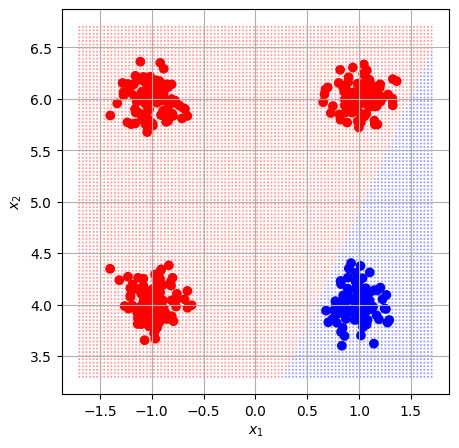

In [64]:
y_true = [1 if x[0] > 0 and x[1] < 5else 0 for x in data]  
nrn = Neuron(w = rng.uniform(size=(2,)), b = rng.uniform())
print(nrn)

epochs =  500
alpha = 1

train_curve = []
for epoch in range(epochs):
    grad = nrn.grad(data, y_true)
    nrn.w -= alpha * grad[:-1]
    nrn.b -= alpha * grad[-1]
    train_curve.append(nrn.mae(data, y_true))

train_curve[-10:]
print(nrn)

y_pred = nrn.predict(data)

x_mesh = np.linspace(-1.7, 1.7, 100)  # x coordinates
y_mesh = np.linspace(3.3, 6.7, 100)    # y coordinates
X, Y = np.meshgrid(x_mesh, y_mesh)    # combine each one with each one
data_mesh = np.array([X.reshape(-1), Y.reshape(-1)]).T  # create a dataset that covers the whole plane
y_mesh = nrn.predict(data_mesh)

colors = ['r', 'b']

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data_mesh[:, 0], data_mesh[:, 1], color=[colors[y] for y in y_mesh], s=0.1, alpha=0.6)
ax.scatter(data[:, 0], data[:, 1], color=[colors[y] for y in y_pred])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.grid()